## DATA PREPROCESSING

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer

import time
import math
import json
import os

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import csv

In [0]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s) 

In [4]:
os.chdir("/content/drive/My Drive/IDS 561/Project/old")
# os.chdir("...filepath")
!ls


business_data_file.csv	    spark-2.4.5-bin-hadoop2.7.tgz
Dataset_User_Agreement.pdf  subset_df.csv
merged_dataset2.csv	    user_data_file.csv
merged_dataset.csv	    yelp_academic_dataset_business.json
P.csv			    yelp_academic_dataset_checkin.json
Q.csv			    yelp_academic_dataset_review.json
review_data_file.csv	    yelp_academic_dataset_tip.json
spark-2.4.5-bin-hadoop2.7   yelp_academic_dataset_user.json


In [0]:
from datetime import datetime
import pytz

All the orginial data is in the JSON format. for ease of use, we save them into csv files

In [24]:
users = []
for line in open('yelp_academic_dataset_user.json', 'r'):
    users.append(json.loads(line))

data_file = open('user_data_file.csv', 'w')
csv_writer = csv.writer(data_file)

count = 0
  
for emp in users: 
    if count == 0: 

        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close() 

del users
us_tb = pd.read_csv("user_data_file.csv")
us_tb.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37,8,9,2,1,1,22,28,31,31,19,31


In [25]:
business = []
for line in open('yelp_academic_dataset_business.json', 'r'):
    business.append(json.loads(line))

data_file = open('business_data_file.csv', 'w')
csv_writer = csv.writer(data_file)

count = 0
  
for emp in business: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close() 

del business
business_tb = pd.read_csv("business_data_file.csv")
business_tb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [26]:
review = []
for line in open('yelp_academic_dataset_review.json', 'r'):
    review.append(json.loads(line))


data_file = open('review_data_file.csv', 'w')
csv_writer = csv.writer(data_file)

count = 0
  
for emp in review: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close() 
del review
review_tb = pd.read_csv("review_data_file.csv")
review_tb.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [27]:
#since we wont be using all the attributes in the review table, we save the relevant columns in a new dataframe
subset_df = review_tb[['review_id', 'user_id', 'business_id', 'stars', 'text', 'date']]
subset_df.head()

,review_id,user_id,business_id,stars,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [28]:
subset_df = review_tb[['review_id', 'user_id', 'business_id', 'stars', 'text', 'date']]
subset_df.columns = ['review_id', 'user_id', 'business_id', 'review_stars', 'text', 'date']


# for the business tabel, we would have to do a little clean up the Categories column. 
# The objective is to identify the businesses with the tag 'Restaurant' in them.
# The count column measures the number of categories tag per business. 
business_tb = pd.read_csv("business_data_file.csv")
business_tb['categories'] = business_tb['categories'].apply(lambda x: str(x).split(','))
business_tb['categories'] = business_tb['categories'].apply(lambda x: [y.strip() for y in x])

business_tb['count'] = business_tb['categories'].apply(lambda x: len(x))
business_tb['food'] = business_tb['categories'].apply(lambda x: 'Restaurants' in x)
business_tb.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,count,food
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","[Active Life, Gun/Rifle Ranges, Guns & Ammo, S...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",4,False
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","[Health & Medical, Fitness & Instruction, Yoga...",NaN,5,False
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"[Pets, Pet Services, Pet Groomers]",NaN,3,False
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","[Hardware Stores, Home Services, Building Supp...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",5,False
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","[Home Services, Plumbing, Electricians, Handym...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",5,False


In [29]:
#let us look at the total number of businesses that have the tag 'Restaurants' 
business_tb['food'].value_counts()


False    145449
True      63944
Name: food, dtype: int64

In [0]:
# Let us now merge the subset and business table to add the business name, state. 
pd.options.display.max_colwidth=30
subset_df = pd.merge(subset_df,business_tb, how= 'left',on='business_id')[['review_id', 'user_id', 'business_id','name','state', 'review_stars', 'text', 'date','categories','food']]
subset_df.columns = ['review_id', 'user_id', 'business_id', 'business_name', 'state','review_stars', 'text', 'date',  'categories', 'food']
# renaming columns to reflect the appropriate heading

In [31]:
#Joining the table with the user table to add the user name, and the data since when the user has been on Yelp
subset_df = pd.merge(subset_df,us_tb, how= 'left',on='user_id')[['review_id', 'user_id', 'business_id', 
                                                     'business_name', 'state','review_stars', 'text', 'date', 'categories', 'food', 'name','yelping_since']]
subset_df.head()

,review_id,user_id,business_id,business_name,state,review_stars,text,date,categories,food,name,yelping_since
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,Bellagio Gallery of Fine Art,NV,2.0,As someone who has worked ...,2015-04-15 05:21:16,"[Shopping, Arts & Entertai...",False,Jamie,2008-12-18 09:41:38
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,AZ,1.0,I am actually horrified th...,2013-12-07 03:16:52,"[Beauty & Spas, Hair Salons]",False,Nicole,2008-09-19 23:34:49
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,OH,5.0,I love Deagan's. I do. I r...,2015-12-05 03:18:11,"[Restaurants, Gastropubs, ...",True,Danielle,2014-11-05 14:36:08
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,Cabo Mexican Restaurant,NV,1.0,"Dismal, lukewarm, defroste...",2011-05-27 05:30:52,"[Restaurants, Mexican]",True,Butch,2010-01-09 19:05:00
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fin...,NV,4.0,"Oh happy day, finally have...",2017-01-14 21:56:57,"[Fast Food, Restaurants, S...",True,Micah,2014-07-21 00:47:49


For the ALS algorithm, the user ids and the item ids have to be integer values, thus, we have to create a uiz and biz for the same

In [0]:
uiz = sorted(list(subset_df['user_id'].unique()))
uiz = {uiz[k]:k for k in range(len(uiz))} 

biz = sorted(list(subset_df['business_id'].unique()))
biz = {biz[k]:k for k in range(len(biz))}

In [33]:
subset_df['uiz'] = subset_df['user_id'].apply(lambda x: uiz[x])
subset_df['biz'] = subset_df['business_id'].apply(lambda x: biz[x])

subset_df.head()

,review_id,user_id,business_id,business_name,state,review_stars,text,date,categories,food,name,yelping_since,uiz,biz
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,Bellagio Gallery of Fine Art,NV,2.0,As someone who has worked ...,2015-04-15 05:21:16,"[Shopping, Arts & Entertai...",False,Jamie,2008-12-18 09:41:38,797678,1205
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,AZ,1.0,I am actually horrified th...,2013-12-07 03:16:52,"[Beauty & Spas, Hair Salons]",False,Nicole,2008-09-19 23:34:49,1578288,162380
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,OH,5.0,I love Deagan's. I do. I r...,2015-12-05 03:18:11,"[Restaurants, Gastropubs, ...",True,Danielle,2014-11-05 14:36:08,986024,60325
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,Cabo Mexican Restaurant,NV,1.0,"Dismal, lukewarm, defroste...",2011-05-27 05:30:52,"[Restaurants, Mexican]",True,Butch,2010-01-09 19:05:00,1620429,20429
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fin...,NV,4.0,"Oh happy day, finally have...",2017-01-14 21:56:57,"[Fast Food, Restaurants, S...",True,Micah,2014-07-21 00:47:49,974620,63596


Now we have all of our variable ready, saved in the subset_df. 
Throughout the notebook, save checkpoints have been incorporated to ensure we dont waste too much time re running the cells.  

In [0]:
subset_df.to_csv("merged_dataset.csv",index=False)##save checkpoint

***For both the models, in order to optimise the run time, 50000 rows were taken from the merged dataset. the same file has been uploaded as subset_df in the repository***

## Recommender systems using ALS

In [0]:
subset_df = pd.read_csv('merged_dataset.csv', nrows = 50000)

Setting up a spark session

In [0]:
%%time
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.mirrors.hoobly.com/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

# outputs cleared since they are really long

In [14]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/My Drive/IDS 561/Project/old/spark-2.4.5-bin-hadoop2.7"

# os.environ["SPARK_HOME"] = "...filepath/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

print("Done")

Done


Using Pyspark dataframes to apply ALS

In [0]:
# import libraries
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.sql import Row


In [35]:
#Converting the dataframe's datatype to string to convert it into a pyspark dataframe
data = subset_df.astype(str)

data_spark = spark.createDataFrame(data)
data_spark.show()

+--------------------+--------------------+--------------------+--------------------+-----+------------+--------------------+-------------------+--------------------+----+--------+-------------------+------+----+
|           review_id|             user_id|         business_id|       business_name|state|review_stars|                text|               date|          categories|food|    name|      yelping_since|   uiz| biz|
+--------------------+--------------------+--------------------+--------------------+-----+------------+--------------------+-------------------+--------------------+----+--------+-------------------+------+----+
|LG2ZaYiOgpr2DK_90...|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|Deagan's Kitchen ...|   OH|         5.0|I love Deagan's. ...|2015-12-05 03:18:11|['Restaurants', '...|True|Danielle|2014-11-05 14:36:08|104315|1709|
|i6g_oA9Yf9Y31qt0w...|ofKDkJKXSKZXu5xJN...|5JxlZaqCnk1MnbgRi...|Cabo Mexican Rest...|   NV|         1.0|Dismal, lukewarm,...|2011-05-27 05:30:52|['R

In [36]:
#convert stars / Biz/ Uiz back to right data-type
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

df1 = data_spark.withColumn("review_stars",col("review_stars").cast(FloatType())).withColumn("Biz",col("Biz").cast(IntegerType())).withColumn("Uiz",col("Uiz").cast(IntegerType()))
df1.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- business_name: string (nullable = true)
 |-- state: string (nullable = true)
 |-- review_stars: float (nullable = true)
 |-- text: string (nullable = true)
 |-- date: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- food: string (nullable = true)
 |-- name: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- Uiz: integer (nullable = true)
 |-- Biz: integer (nullable = true)



In [37]:
#split dataset into training, validation, and testing
import random
random.seed(123)
(training, validation,testing) = df1.randomSplit([0.70,0.10, 0.2])
fulltraining = training.union(validation)
fulltraining.show(10)

+--------------------+--------------------+--------------------+--------------------+-----+------------+--------------------+-------------------+--------------------+----+---------+-------------------+------+----+
|           review_id|             user_id|         business_id|       business_name|state|review_stars|                text|               date|          categories|food|     name|      yelping_since|   Uiz| Biz|
+--------------------+--------------------+--------------------+--------------------+-----+------------+--------------------+-------------------+--------------------+----+---------+-------------------+------+----+
|--MC9foCbGXJ0d0W_...|4suJsf9Q2uruOwKln...|ACb637NG7EnswRs8U...|Bar Louie - Tempe...|   AZ|         4.0|I've only been he...|2017-01-28 00:41:41|['Beer', 'Wine & ...|True|  Jeffrey|2008-03-25 11:01:51| 19514|1028|
|--heTyt0akG0nZZ-s...|JCRtGjbiOeB4I5BYL...|9Jo1pu0y2zU6ktiwQ...| Coconut's Fish Cafe|   AZ|         3.0|Good place and a ...|2018-07-08 01:08:16

Now we apply the ALS algorithm. We will tune the Rank as well as the regularizer

In [38]:
#Cross validation

als = ALS(userCol="Uiz", itemCol="Biz", ratingCol="review_stars", nonnegative=True)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="review_stars",predictionCol="prediction")

ranks = [x for x in range(1,150,15)]
regparam = [.1,.15,.25,.35,.5]

best_par = -10
best_rank = -10

min_err = float('inf')

Reg = ['Regulariser']
cv_table = pd.DataFrame(columns = Reg )
cv_table['Regulariser'] = regparam

print("Starting the Validation process")
for r in ranks:
  als.setRank(r)
  j = 0

  for par in regparam:


    als.setRegParam(par)
    model = als.fit(training)
    pred = model.transform(validation)
    pred_clean = pred.filter(pred.prediction !=float('nan') )
    rmse = evaluator.evaluate(pred_clean)

    cv_table.loc[j,r] = rmse

    j+=1 

    if rmse < min_err:
      min_err = rmse
      best_rank = r
      best_par = par
    
    iterstart = time.time()

print("Best Rank = ",best_rank ,"Best Regularizer", best_par, "Min Error", round(min_err,4) )
cv_table

Starting the Validation process
Best Rank =  1 Best Regularizer 0.35 Min Error 1.8351


,Regulariser,1,16,31,46,61,76,91,106,121,136
0,0.10,1.926671,2.051878,2.056115,2.053630,2.052069,2.033874,2.035154,2.025638,2.023052,2.024947
1,0.15,1.866888,2.015505,2.035612,2.041767,2.041547,2.030765,2.029840,2.026517,2.025783,2.029936
2,0.25,1.836784,1.983073,2.009812,2.016160,2.018551,2.013448,2.009989,2.010458,2.011889,2.018401
3,0.35,1.835130,1.979203,2.006500,2.008297,2.013583,2.009305,2.005867,2.005098,2.007479,2.014579
4,0.50,1.848616,2.008940,2.034658,2.031619,2.040119,2.034954,2.032428,2.028859,2.032465,2.038916


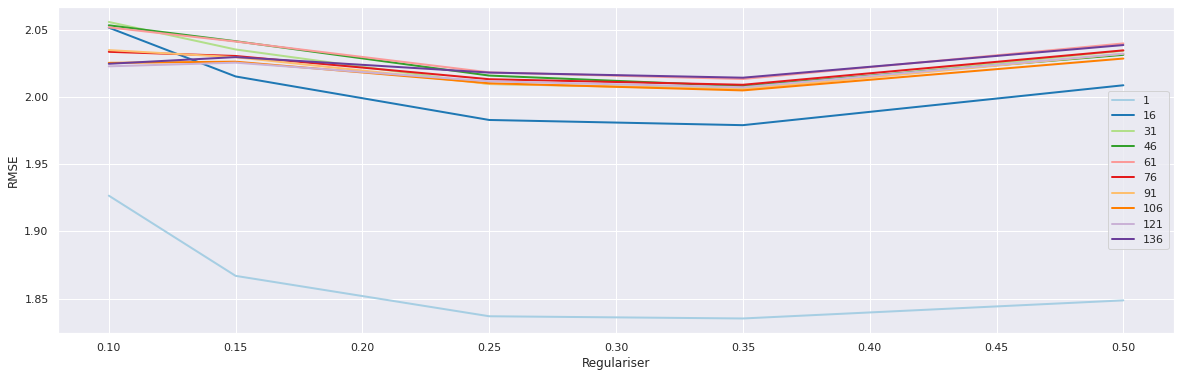

In [39]:
#Let us look at the RMSE by each rank

fig, ax =plt.subplots(1,1 , figsize=(20,6))

sns.set()
data1 = pd.melt(cv_table, ['Regulariser'])#reshaping the dataframe for visualisation 
data1.columns = ['Regulariser', 'Ranks', 'RMSE']
sns.lineplot(x='Regulariser', y='RMSE', hue='Ranks', data=data1,palette= sns.color_palette('Paired', n_colors=len(ranks)), linewidth=2)
ax.legend(ranks)

# We can see the best regulariser giving us the lowest RMSE shown below

In [40]:
#using the best rank and regulariser to train the model 
als = ALS(userCol="Uiz", itemCol="Biz", ratingCol="review_stars", nonnegative=True)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="review_stars",predictionCol="prediction")

als.setRank(best_rank)
als.setRegParam(best_par)
model = als.fit(fulltraining)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(testing)
rmse = evaluator.evaluate(predictions)
predicted_clean = predictions.filter(predictions.prediction != float('nan'))

rmse = evaluator.evaluate(predicted_clean)
print("Root-mean-square error = " , round(rmse,4))

Root-mean-square error =  1.8092


In [41]:
# Generate top 3 restaurant recommendations for each user
userRecs = model.recommendForAllUsers(3)
userRecs.show()
# Generate top 3 user recommendations for each restaurant
BusRecs = model.recommendForAllItems(3)

+-----+--------------------+
|  Uiz|     recommendations|
+-----+--------------------+
|  471|[[5634, 1.5979846...|
| 1580|[[5634, 7.7743945...|
| 1645|[[5634, 1.5642692...|
| 1829|[[5634, 7.8565564...|
| 3997|[[5634, 5.9101896...|
| 4101|[[5634, 1.7401619...|
| 4818|[[20, 0.0], [30, ...|
| 7253|[[5634, 7.832818]...|
| 9465|[[5634, 6.4591274...|
|11033|[[5634, 8.144284]...|
|15619|[[5634, 6.3040795...|
|15727|[[5634, 6.9905157...|
|16574|[[5634, 6.557155]...|
|18654|[[5634, 4.978179]...|
|18911|[[5634, 7.6151533...|
|21700|[[5634, 8.072119]...|
|22223|[[5634, 7.8536725...|
|22346|[[5634, 3.4531863...|
|23015|[[5634, 3.391267]...|
|24354|[[5634, 8.921169]...|
+-----+--------------------+
only showing top 20 rows



In [0]:
# to get back the name of the business and the users, we create dictionaries to reverse map the same. 

mymap = subset_df[['biz','business_name']]
mapper = {}
for i in range(len(subset_df)):
  mapper[mymap['biz'][i]] = mymap['business_name'][i]
usermap = subset_df[['uiz','name']]
user_mapper = {}
for i in range(len(subset_df)):
  user_mapper[usermap['uiz'][i]] = usermap['name'][i]
del mymap
del usermap


In [43]:
# convert to pandas dataframe
result_als = userRecs.select("*").toPandas()
result_als["recommendations"] = result_als["recommendations"].apply(lambda x: [x[i][0] for i in range(3)] )#removing the restaurant ratings, retaining only the ids
result_als.head()

,Uiz,recommendations
0,471,"[5634, 4919, 4404]"
1,1580,"[5634, 4919, 4404]"
2,1645,"[5634, 4919, 4404]"
3,1829,"[5634, 4919, 4404]"
4,3997,"[5634, 4919, 4404]"


In [44]:
## now we have to clean up the recommendations column to map back the business names and add a column for the user names

result_als["recommendations"] = result_als["recommendations"].apply(lambda x: [mapper[int(x)] for x in x])
result_als.columns = ['User_Id', "Recommendations"]
result_als["User Name"] = result_als["User_Id"].apply(lambda x : user_mapper[int(x)])
pd.options.display.max_colwidth=100
result_als["Recommendations"] = result_als["Recommendations"].apply(lambda x: str(x))
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r'[', "")
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r']', "")
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r"'", "")
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r'"', "")

result_als = result_als[['User_Id', 'User Name','Recommendations']]
result_als.head()

,User_Id,User Name,Recommendations
0,471,Margaret,"Nicks Family Restaurant, Sub Factory, The Bier Haus"
1,1580,Colleen,"Nicks Family Restaurant, Sub Factory, The Bier Haus"
2,1645,R,"Nicks Family Restaurant, Sub Factory, The Bier Haus"
3,1829,Robert,"Nicks Family Restaurant, Sub Factory, The Bier Haus"
4,3997,Mike,"Nicks Family Restaurant, Sub Factory, The Bier Haus"


## Query Based Recommendation for users 

Here we use the tfidf scores of the tokenised reviews to predict top three places the users should go to. 

In [46]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#clean punctuation and stopwords out of text 
def text_cleaner(txt):

  stop = []
  for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

  nopunc = [char for char in txt if char not in string.punctuation]
  #join char back to a string
  nopunc = ''.join(nopunc)
  
  return " ".join([word for word in nopunc.split() if word.lower() not in stop])

In [0]:
subset_df['clean_text'] = subset_df['text'].apply(text_cleaner)
subset_df.to_csv("merged_dataset2.csv",index=False)##save checkpoint
subset_df.head()

CPU times: user 2min 40s, sys: 5.09 s, total: 2min 45s
Wall time: 2min 47s


In [48]:
pd.options.display.max_colwidth = 20
rows = 50000
subset_df = pd.read_csv('merged_dataset2.csv', nrows=rows)

subset_df['categories'] = subset_df["categories"].apply(lambda x : x.replace("[", " ").strip(" "))
subset_df['categories'] = subset_df["categories"].apply(lambda x : x.replace("]", " ").strip(" "))
subset_df['categories'] = subset_df["categories"].apply(lambda x : x.replace("'", "").strip(" "))
subset_df.shape


(50000, 15)

In [0]:
user_df = subset_df[['user_id','clean_text']]
bus_df = subset_df[['business_id', 'clean_text']]

#append all the text for each user && each restaurant
u_df = user_df.groupby('user_id').agg({'clean_text': ' '.join})
b_df = bus_df.groupby('business_id').agg({'clean_text': ' '.join})

In [50]:
#apply the TFIDF Vectorizer to extract the features from the text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import WordPunctTokenizer

#userid vectorizer
user_vec = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
u_vectors = user_vec.fit_transform(u_df['clean_text'])

#Business id vectorizer
bus_vec = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
b_vectors = bus_vec.fit_transform(b_df['clean_text'])

# Matrix Factorization
rating_matrix = pd.pivot_table(subset_df, values='review_stars', index=['user_id'], columns=['business_id'])
rating_matrix.shape

(42940, 4551)

In [0]:
#To avoid our model overfitting we have to add regularization to our LSE formula 
#apply the equation to minimize the error using Gradient Decent
#update the values of each feature in matrix P and matrix Q.
 
from datetime import datetime
import pytz
 
def matrix_factorization(R, P, Q, steps=25, gamma=0.001,lamda=0.02, threshold = 0.001):
    start = time.time()
    zz =0
    tot = len(R.index)*len(R.columns)*2*steps
    print(tot)
    tz = pytz.timezone('America/Chicago') 
    datetime_CH = datetime.now(tz)
    print("Start",datetime_CH.strftime('%Y-%m-%d %H:%M:%S'))
    iter= 1
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
                    zz+=1
                    
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
                    zz+=1

        print("Iter #", iter,datetime.now(tz).strftime('%Y-%m-%d %H:%M:%S'), timeSince(start))
        iter+=1
        if e<threshold:
            print(zz)
            break
    print("Iterations :", zz)  
    return P,Q

In [52]:
print(rating_matrix.shape)

(42940, 4551)


In [0]:
P = pd.DataFrame(u_vectors.toarray(), index=u_df.index, columns=user_vec.get_feature_names())
Q = pd.DataFrame(b_vectors.toarray(), index=b_df.index, columns=bus_vec.get_feature_names())

In [0]:
%%time
P = pd.DataFrame(u_vectors.toarray(), index=u_df.index, columns=user_vec.get_feature_names())
Q = pd.DataFrame(b_vectors.toarray(), index=b_df.index, columns=bus_vec.get_feature_names())

P, Q = matrix_factorization(rating_matrix, P, Q, steps=5, gamma=0.01,lamda=0.01,threshold = 0.0075)

P.to_csv("P.csv")
Q.to_csv("Q.csv")

In [53]:
## reading the dataframes from saved locations --this was to ensure that we dont lose the model outputs

P = pd.read_csv('P.csv')
Q = pd.read_csv('Q.csv')

print("Shape P:", P.shape,  "Shape Q:", Q.shape)

P.index = P['user_id']
P = P.drop(columns='user_id')

Q.index = Q['business_id']
Q = Q.drop(columns='business_id')

print("Shape P:", P.shape,  "Shape Q:", Q.shape)

Shape P: (42940, 1001) Shape Q: (4551, 1001)
Shape P: (42940, 1000) Shape Q: (4551, 1000)


## Time to Test!!

In [54]:
# give me recommendation for sushi!
words = "I want to have sushi"
pred_df= pd.DataFrame([words], columns=['text'])
pred_df['text'] = pred_df['text'].apply(text_cleaner)
pred_vectors = user_vec.transform(pred_df['text'])
pred_v_df = pd.DataFrame(pred_vectors.toarray(), index=pred_df.index, columns=user_vec.get_feature_names())

predItemRating=pd.DataFrame(np.dot(pred_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecom=pd.DataFrame.sort_values(predItemRating,['Rating'],ascending=[0])[:3]

# print the result
print("USER QUERY : ",words+"\n")
for i in topRecom.index:
  print(subset_df[subset_df['business_id']==i]['name'].iloc[0])
  print(subset_df[subset_df['business_id']==i]['categories'].iloc[0])
  print("stars: "+ str(subset_df[subset_df['business_id']==i]['review_stars'].iloc[0])+"\n")
    


USER QUERY :  I want to have sushi

Hannah
Japanese, Restaurants, Sushi Bars
stars: 4.0

Sarvin
Restaurants, Sushi Bars, Buffets, Japanese, Bars, Nightlife
stars: 5.0

Caroline
Korean, Food, Sushi Bars, Desserts, Chinese, Japanese, Restaurants, Breakfast & Brunch
stars: 5.0



In [55]:
# give me recommendation for Tacos!
words = "I want to have Tacos"
pred_df= pd.DataFrame([words], columns=['text'])
pred_df['text'] = pred_df['text'].apply(text_cleaner)
pred_vectors = user_vec.transform(pred_df['text'])
pred_v_df = pd.DataFrame(pred_vectors.toarray(), index=pred_df.index, columns=user_vec.get_feature_names())

predItemRating=pd.DataFrame(np.dot(pred_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecom=pd.DataFrame.sort_values(predItemRating,['Rating'],ascending=[0])[:3]

# print the result
print("USER QUERY : ",words+"\n")
for i in topRecom.index:
  print(subset_df[subset_df['business_id']==i]['name'].iloc[0])
  print(subset_df[subset_df['business_id']==i]['categories'].iloc[0])
  print("stars: "+ str(subset_df[subset_df['business_id']==i]['review_stars'].iloc[0])+"\n")

USER QUERY :  I want to have Tacos

Briana
Restaurants, Seafood, Mexican, Latin American, Tex-Mex
stars: 5.0

Erin
American (New), Mexican, Restaurants
stars: 2.0

Amber
Mexican, Breakfast & Brunch, Restaurants
stars: 5.0



In [56]:
# give me recommendation for Birthday Party!
words = "I want a place for a birthday party"
pred_df= pd.DataFrame([words], columns=['text'])
pred_df['text'] = pred_df['text'].apply(text_cleaner)
pred_vectors = user_vec.transform(pred_df['text'])
pred_v_df = pd.DataFrame(pred_vectors.toarray(), index=pred_df.index, columns=user_vec.get_feature_names())

predItemRating=pd.DataFrame(np.dot(pred_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecom=pd.DataFrame.sort_values(predItemRating,['Rating'],ascending=[0])[:3]

# print the result
print("USER QUERY : ",words+"\n")
for i in topRecom.index:
  print(subset_df[subset_df['business_id']==i]['name'].iloc[0])
  print(subset_df[subset_df['business_id']==i]['categories'].iloc[0])
  print("stars: "+ str(subset_df[subset_df['business_id']==i]['review_stars'].iloc[0])+"\n")

USER QUERY :  I want a place for a birthday party

Brandon
American (Traditional), Mini Golf, Arcades, Pizza, Cinema, Restaurants, Arts & Entertainment, Italian, Food, Active Life, Bowling, Beer, Wine & Spirits
stars: 5.0

Chro
Bars, Sports Bars, Mexican, Restaurants, Nightlife, Food, Dance Clubs
stars: 1.0

Cassie
Restaurants, Local Flavor, Pizza, American (Traditional), Salad, Italian
stars: 4.0



In [57]:
# give me recommendation for Birthday Party!
words = "I want a romantic place"
pred_df= pd.DataFrame([words], columns=['text'])
pred_df['text'] = pred_df['text'].apply(text_cleaner)
pred_vectors = user_vec.transform(pred_df['text'])
pred_v_df = pd.DataFrame(pred_vectors.toarray(), index=pred_df.index, columns=user_vec.get_feature_names())

predItemRating=pd.DataFrame(np.dot(pred_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecom=pd.DataFrame.sort_values(predItemRating,['Rating'],ascending=[0])[:3]

# print the result
print("USER QUERY : ",words+"\n")
for i in topRecom.index:
  print(subset_df[subset_df['business_id']==i]['name'].iloc[0])
  print(subset_df[subset_df['business_id']==i]['categories'].iloc[0])
  print("stars: "+ str(subset_df[subset_df['business_id']==i]['review_stars'].iloc[0])+"\n")

USER QUERY :  I want a romantic place

Cimirriar
Cajun/Creole, Vietnamese, Seafood, Restaurants, American (Traditional)
stars: 5.0

Cassie
Restaurants, Local Flavor, Pizza, American (Traditional), Salad, Italian
stars: 4.0

Jenny
Restaurants, Food, Cafes, Tea Rooms, Bubble Tea, Desserts
stars: 5.0

